# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Talha KABA
## Student ID: ****7650\*\*


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

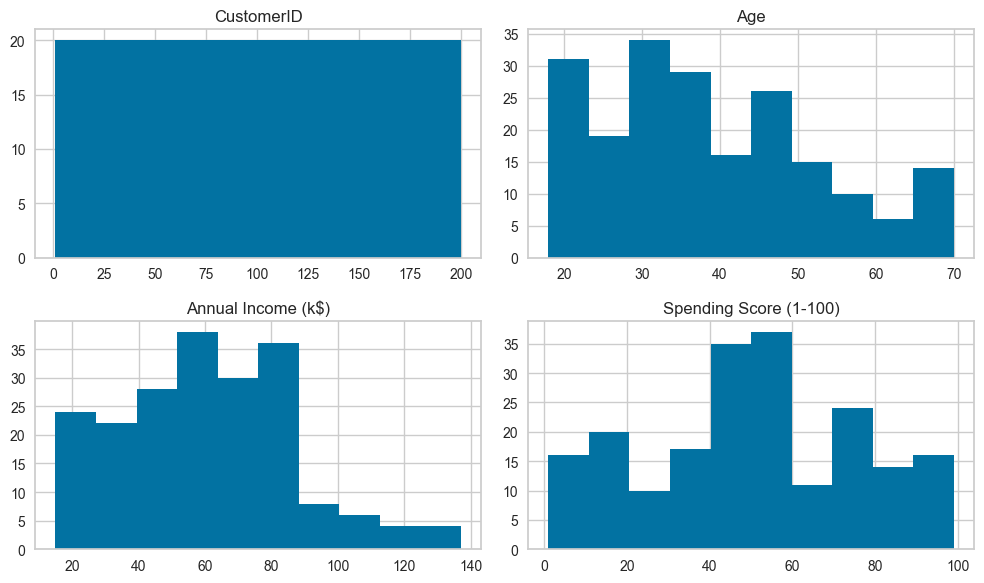

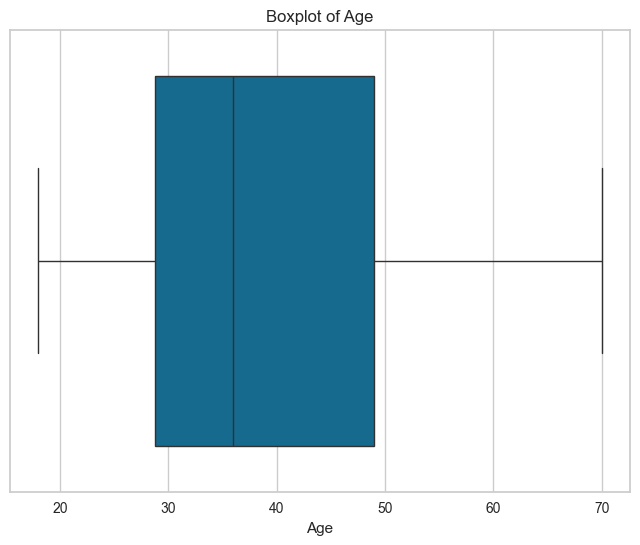

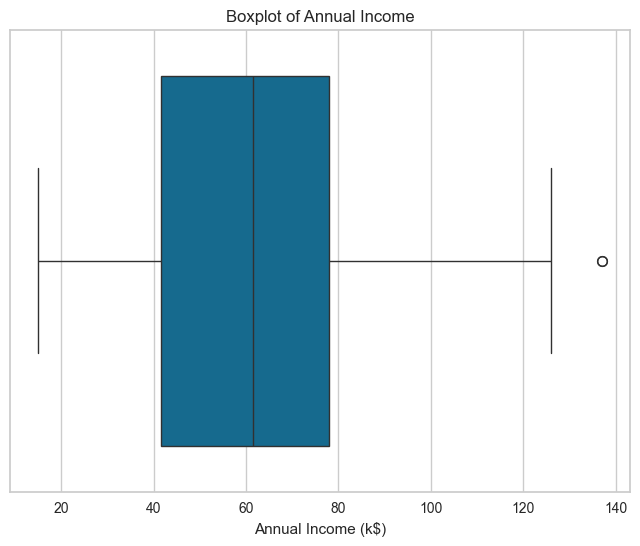

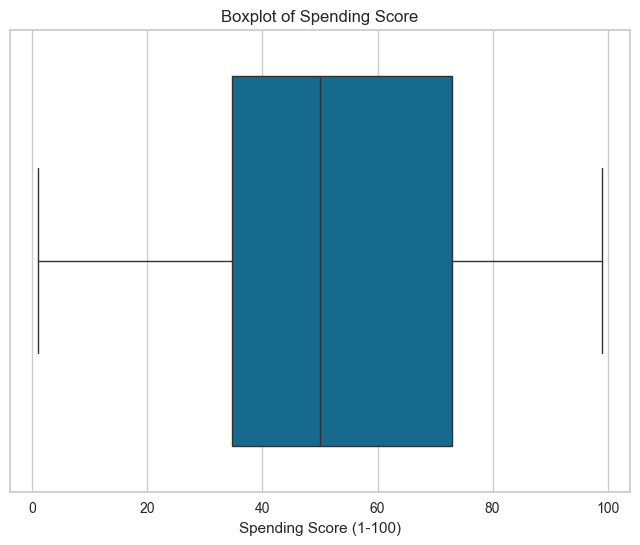

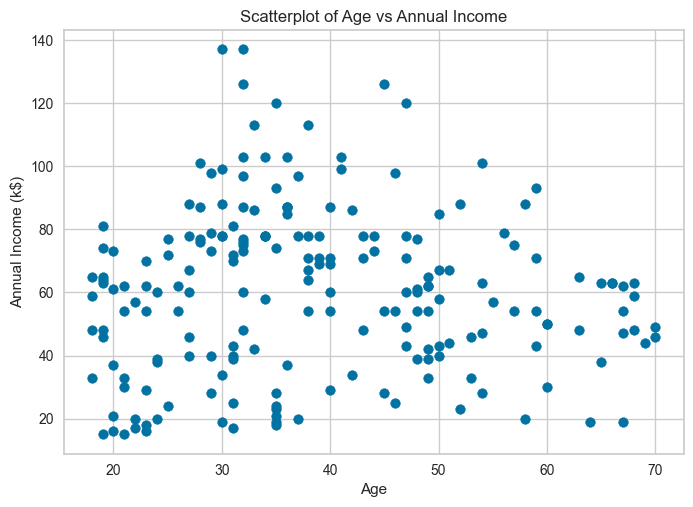

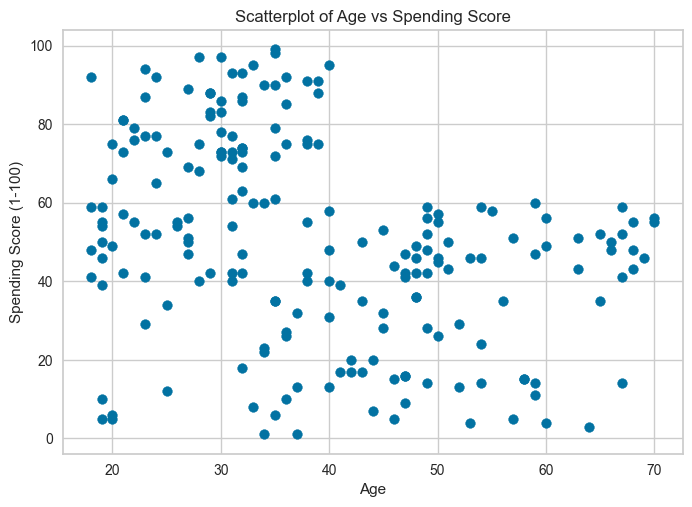

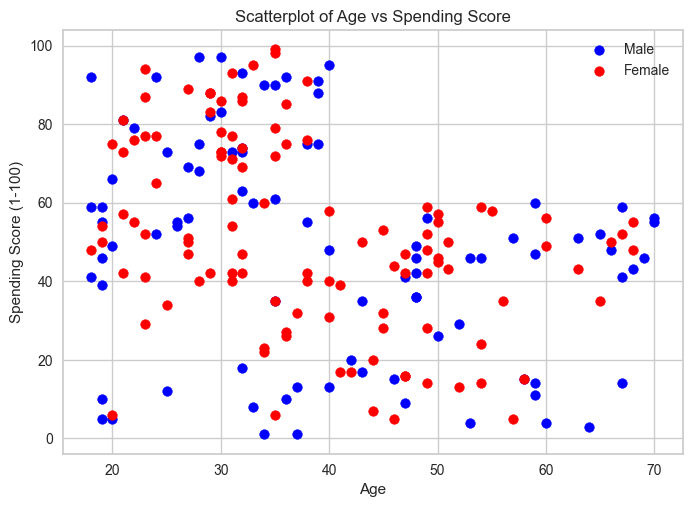

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Number of outliers in , Annual Income: 4
Number of outliers in Spending Score: 19
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                      50
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                      50
7             8  Female   23                  18                      50
8             9    Male   64                  19                      50
9            10  Female   30       

C:\Users\Talha\AppData\Local\Temp\ipykernel_1176\983896951.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '61.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, col] = df[col].median()


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('Mall_Customers.csv')
print(df.head(200))
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.title('Boxplot of Annual Income')
plt.show()

# Boxplot for Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)')
plt.title('Boxplot of Spending Score')
plt.show()

plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatterplot of Age vs Annual Income')
plt.show()

plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot of Age vs Spending Score')
plt.show()

males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

plt.scatter(males['Age'], males['Spending Score (1-100)'], color='blue', label='Male')
plt.scatter(females['Age'], females['Spending Score (1-100)'], color='red', label='Female')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot of Age vs Spending Score')

# Show the legend
plt.legend()

# Show the plot
plt.show()

missing_values = df.isnull().sum()
print(missing_values)


col = 'Annual Income (k$)'
# Calculate IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.3 * IQR
upper_bound = Q3 + 1.3 * IQR

# Identify outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print('Number of outliers in , Annual Income:', outliers.shape[0])

df.loc[outliers.index, col] = df[col].median()

"""
k = 1.3 , 4 outliers found and replaced with median
"""

mcd = EllipticEnvelope(contamination=0.1)
mcd.fit(df[['Spending Score (1-100)']])

outliers = mcd.predict(df[['Spending Score (1-100)']]) == -1

print('Number of outliers in Spending Score:', df[outliers].shape[0])

df.loc[outliers, 'Spending Score (1-100)'] = df['Spending Score (1-100)'].median()

df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(int)

print(df.head(200))

# Encode gender variable
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})








## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

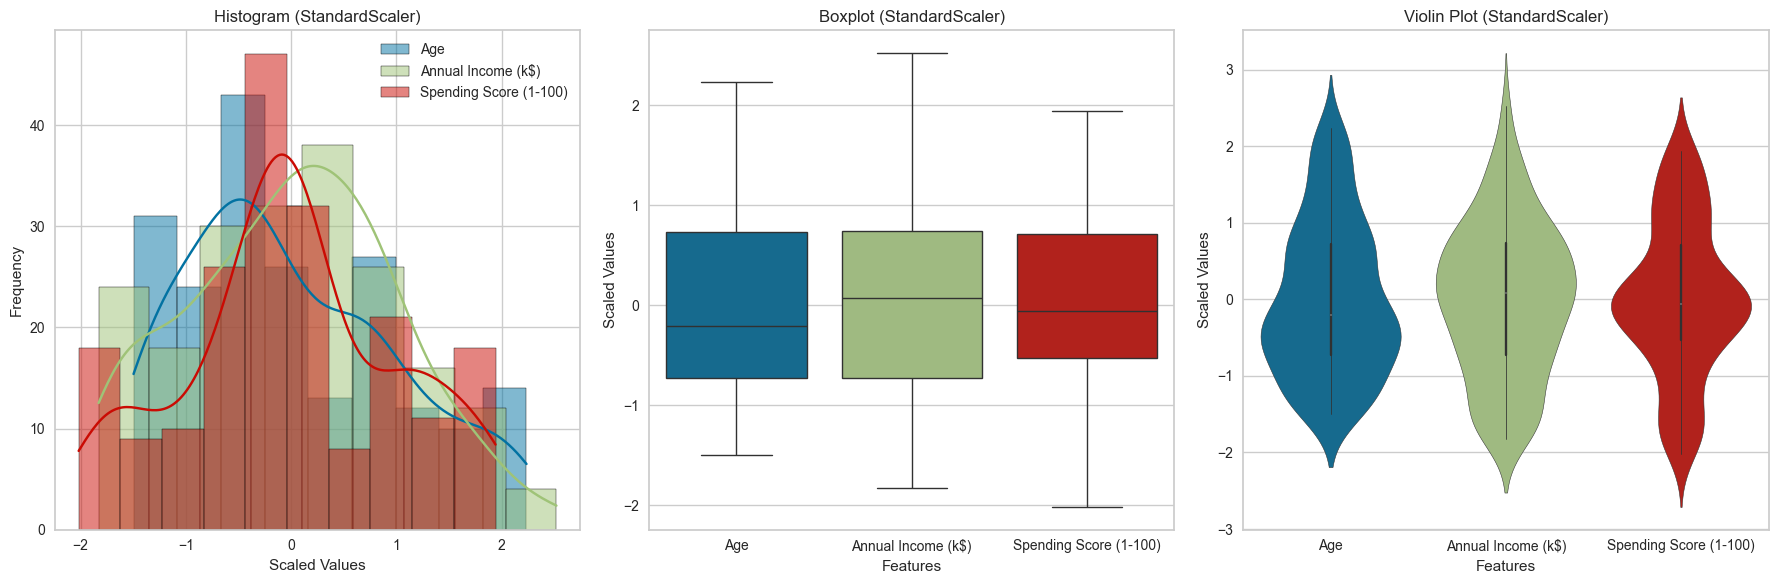

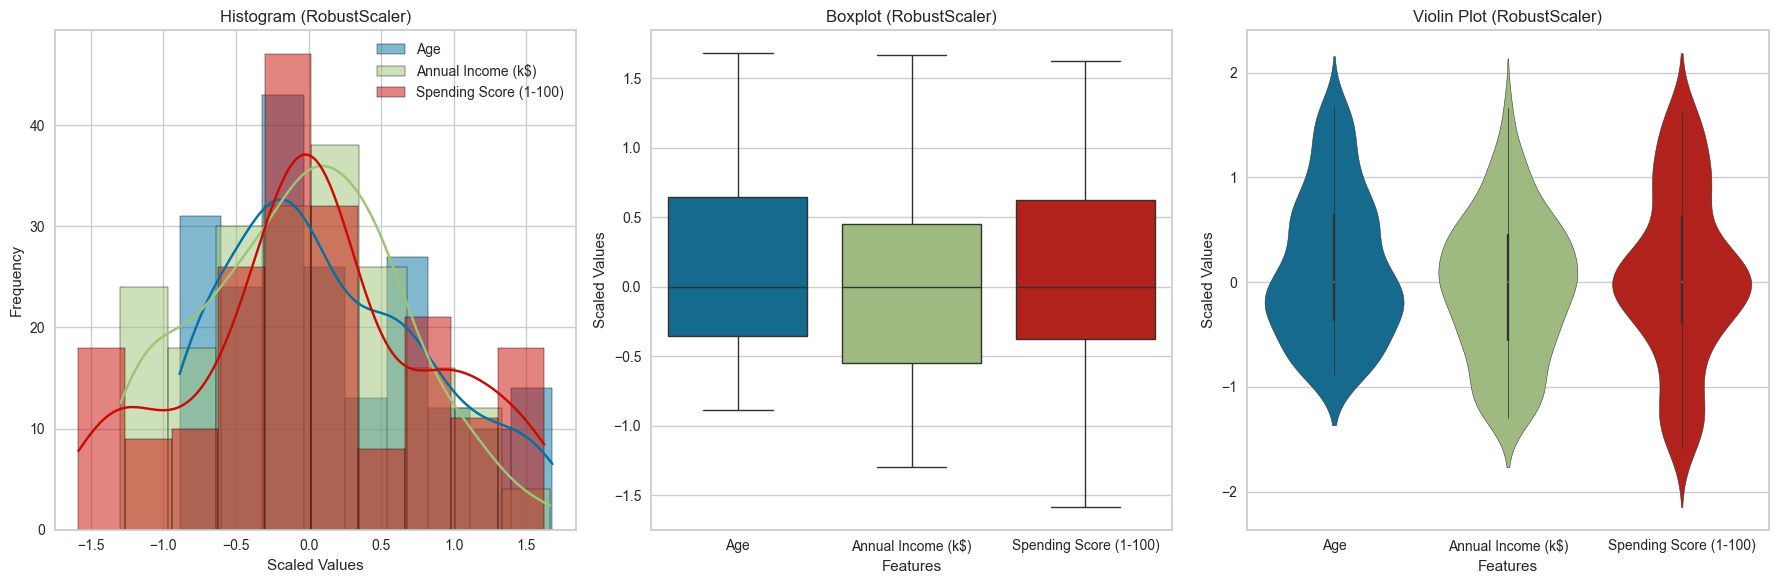

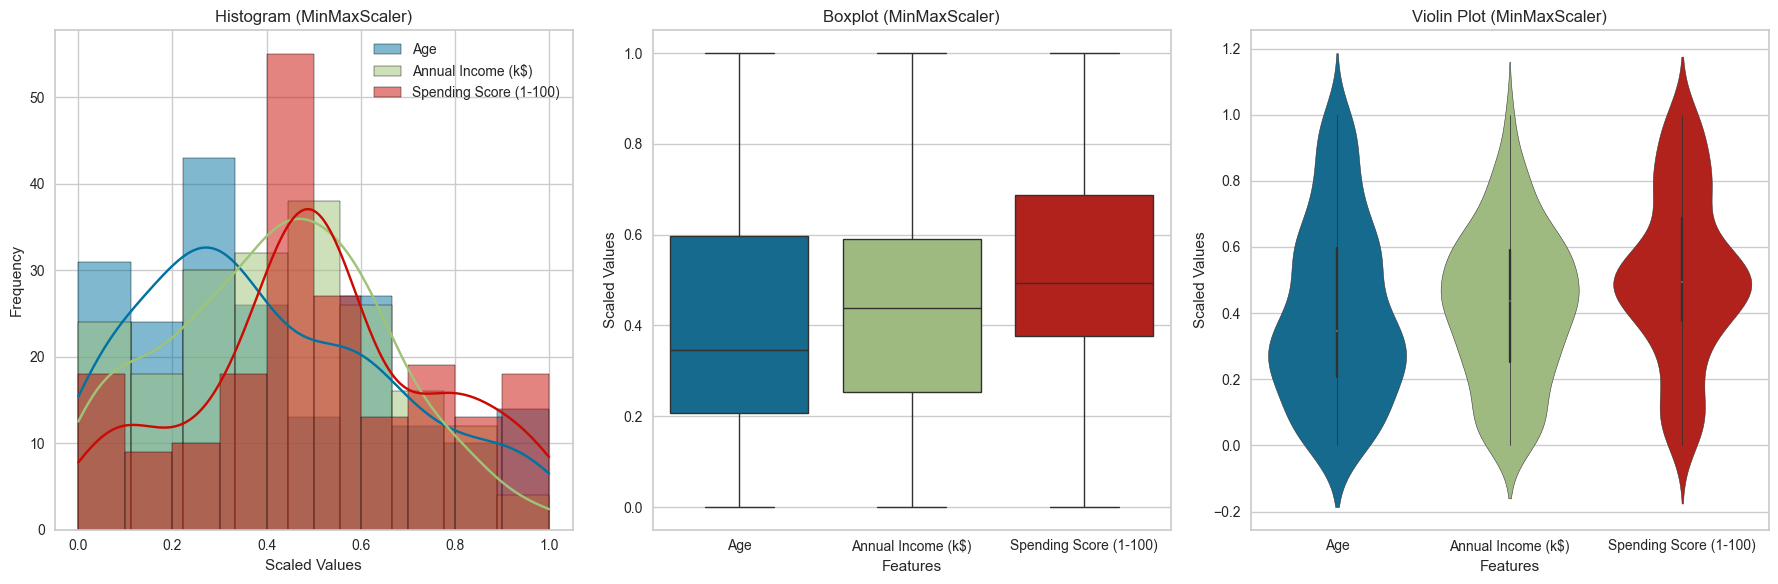

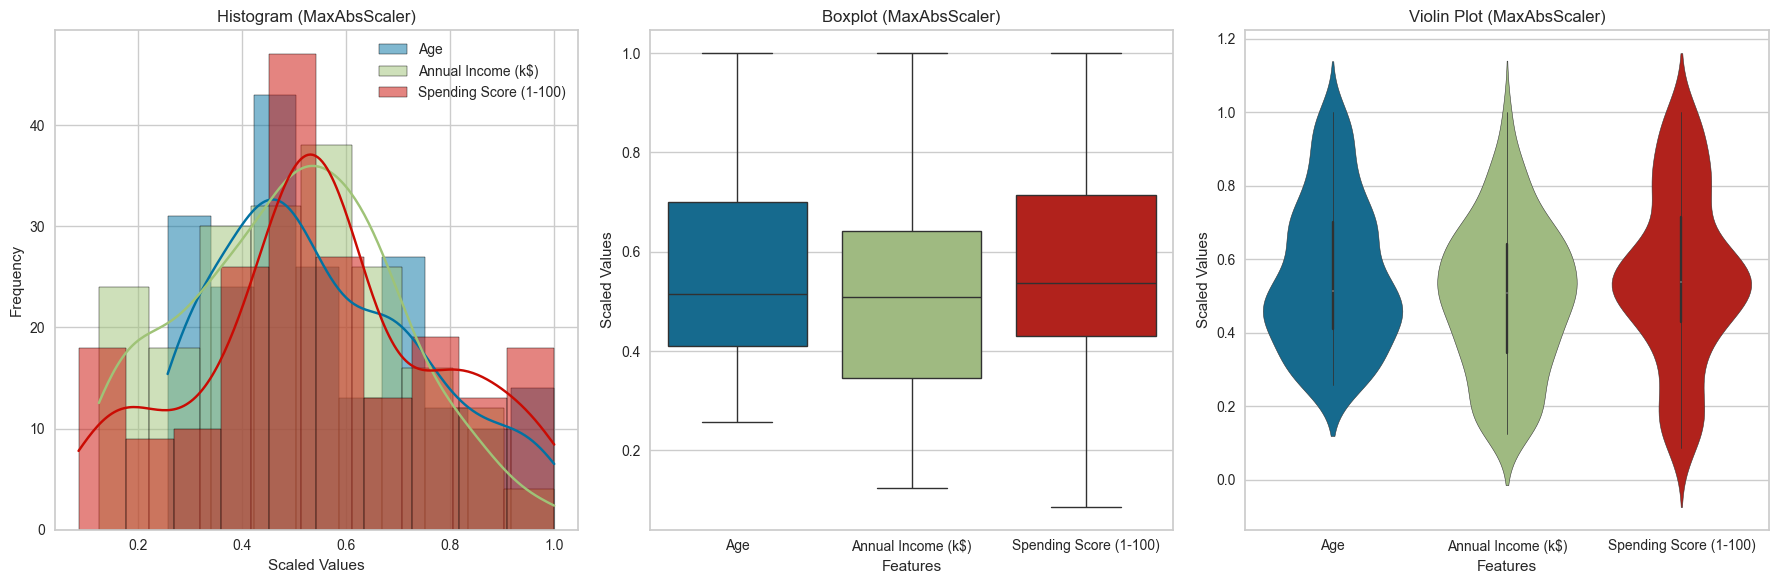

In [93]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
scaled_data = {}

columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Show the distribution of the columns after scaling
for scaler_name, scaler in zip(['StandardScaler', 'RobustScaler', 'MinMaxScaler', 'MaxAbsScaler'],
                               [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()]):
    scaled_data[scaler_name] = scaler.fit_transform(df[columns_to_scale])

for scaler_name, scaled_values in scaled_data.items():
    plt.figure(figsize=(18, 6))
    
    # Plot histogram
    plt.subplot(1, 3, 1)
    for column, scaled_column in zip(columns_to_scale, scaled_values.T):
        sns.histplot(scaled_column, kde=True, label=column)
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram ({scaler_name})')
    plt.legend()
    
    # Plot boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=pd.DataFrame(scaled_values, columns=columns_to_scale))
    plt.xlabel('Features')
    plt.ylabel('Scaled Values')
    plt.title(f'Boxplot ({scaler_name})')
    
    # Plot violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=pd.DataFrame(scaled_values, columns=columns_to_scale))
    plt.xlabel('Features')
    plt.ylabel('Scaled Values')
    plt.title(f'Violin Plot ({scaler_name})')
    
    plt.tight_layout()
    plt.show()


### Best scaler for our dataset is robust scaler.

## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

          Age  Annual Income (k$)  Spending Score (1-100)  Gender
0    1.160494            0.704225                1.584906       1
1    1.259259            0.704225                3.169811       1
2    1.209877            0.732394                2.000000       0
3    1.358025            0.732394                3.018868       0
4    1.753086            0.760563                1.622642       0
5    1.308642            0.760563                2.981132       0
6    1.950617            0.788732                2.000000       0
7    1.358025            0.788732                2.000000       0
8    3.382716            0.816901                2.000000       1
9    1.703704            0.816901                2.830189       0
10   3.530864            0.816901                0.641509       1
11   1.950617            0.816901                2.000000       0
12   3.086420            0.845070                0.679245       0
13   1.407407            0.845070                3.018868       0
14   2.049

C:\Users\Talha\AppData\Local\Temp\ipykernel_1176\2636261159.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_x[:, 0], pca_x[:, 1], cmap='rainbow', edgecolor='k', s=50)


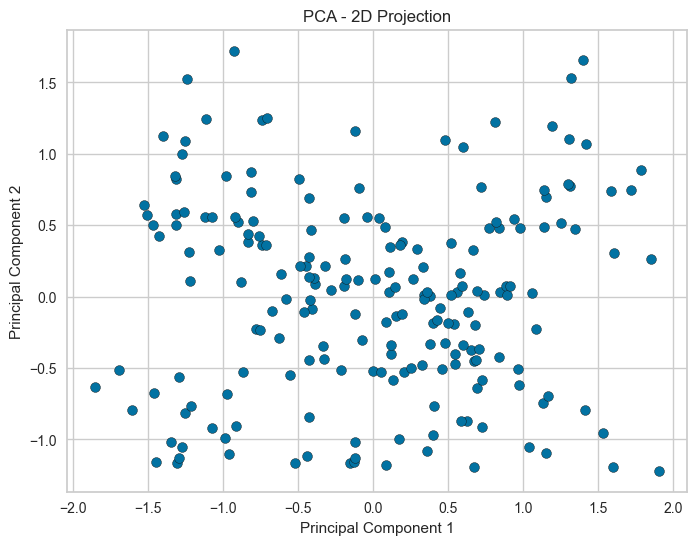

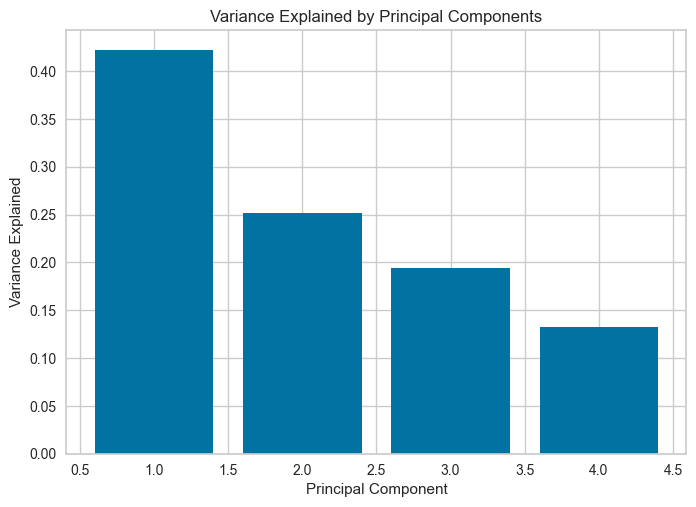

Sum of variances of first 2 components  0.6732255645188134
Sum of variances of first 3 components 0.8672612198027004


In [94]:
from sklearn.decomposition import PCA
import pandas as pd

normalized_data = RobustScaler().fit_transform(df[columns_to_scale]) #Robust Scaler used
normalized_data_with_gender = np.column_stack((normalized_data, df['Gender']))

df_normalized = pd.DataFrame(normalized_data, columns=columns_to_scale)
df_normalized['Annual Income (k$)'] = df_normalized['Annual Income (k$)'] +2
df_normalized['Spending Score (1-100)'] = df_normalized['Spending Score (1-100)'] +2
df_normalized['Age'] = df_normalized['Age'] +2
df_normalized['Gender'] = df['Gender']

print(df_normalized)

pca = PCA()
pca_x=pca.fit_transform(normalized_data_with_gender)

variances = pca.explained_variance_ratio_

# Visualization in 2D, using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_x[:, 0], pca_x[:, 1], cmap='rainbow', edgecolor='k', s=50)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

import matplotlib.pyplot as plt
plt.bar(range(1, len(variances) + 1), variances)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

print("Sum of variances of first 2 components ", sum(variances[:2]))

print("Sum of variances of first 3 components", sum(variances[:3]))


### I cannot see any clusters in the 2D graph.

### "The total variance explained by the first two components is approximately **67%** of the total variance. This suggests that these two components alone are not sufficient to fully represent the data. 

### On the other hand, the first three components account for about **87%** of the total variance. This is a substantial proportion, indicating that these three components are likely sufficient to represent the data."

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

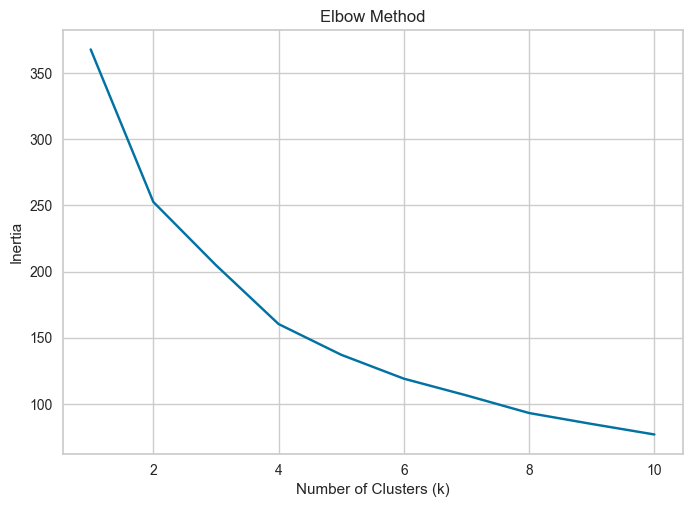

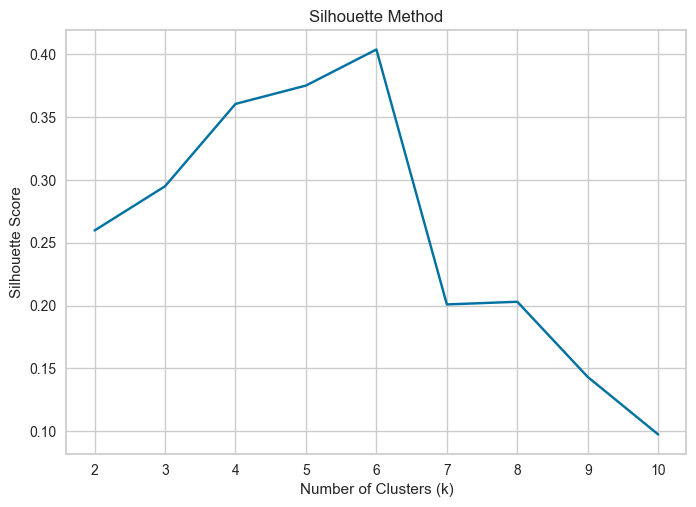

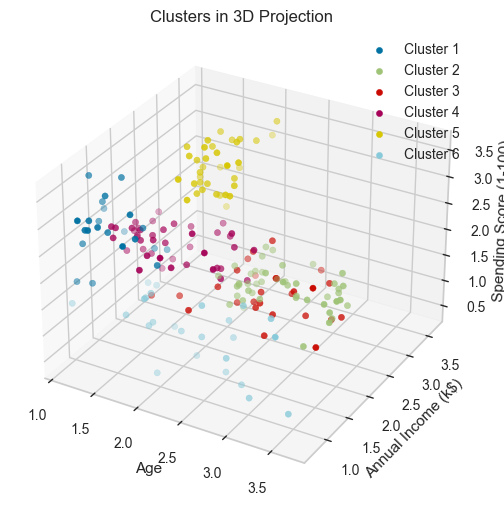

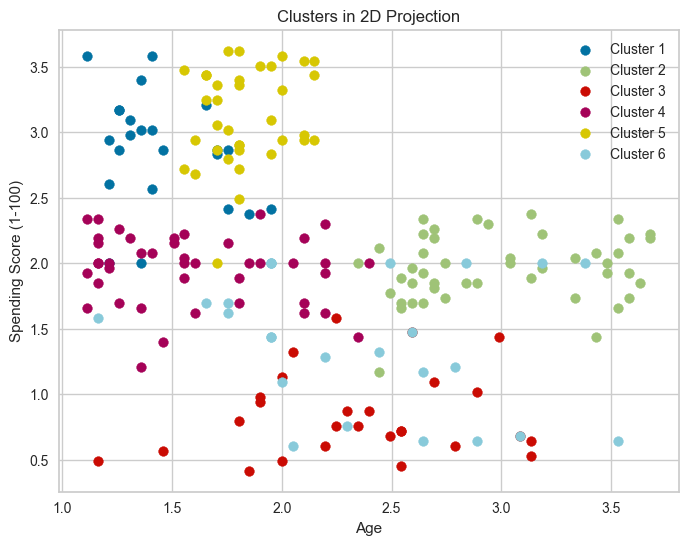

In [95]:
from sklearn.cluster import KMeans

columns_for_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=7)
    kmeans.fit(df_normalized[columns_for_clustering])

    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette method
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=7)
    kmeans.fit(df_normalized[columns_for_clustering])

    silhouette_scores.append(silhouette_score(df[columns_for_clustering], kmeans.labels_))
    

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

optimal_k = 6

kmeans = KMeans(n_clusters=6, random_state=0, n_init=7)
kmeans.fit(df[columns_for_clustering])

# Visualize the resulting clusters in 3D projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for label in range(optimal_k):
    cluster_points = df_normalized[kmeans.labels_ == label]
    ax.scatter(cluster_points['Age'], cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {label+1}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Clusters in 3D Projection')
ax.legend()
plt.show()

# Visualize the resulting clusters in 2D projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for label in range(optimal_k):
    cluster_points = df_normalized[kmeans.labels_ == label]
    ax.scatter(cluster_points['Age'], cluster_points['Spending Score (1-100)'], label=f'Cluster {label+1}')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('Clusters in 2D Projection')
ax.legend()
plt.show()


### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

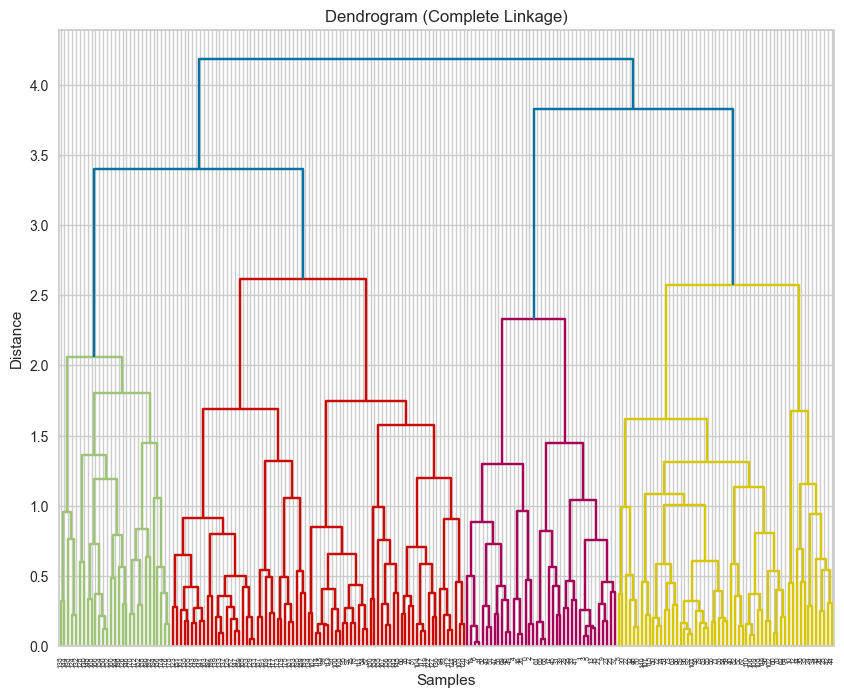

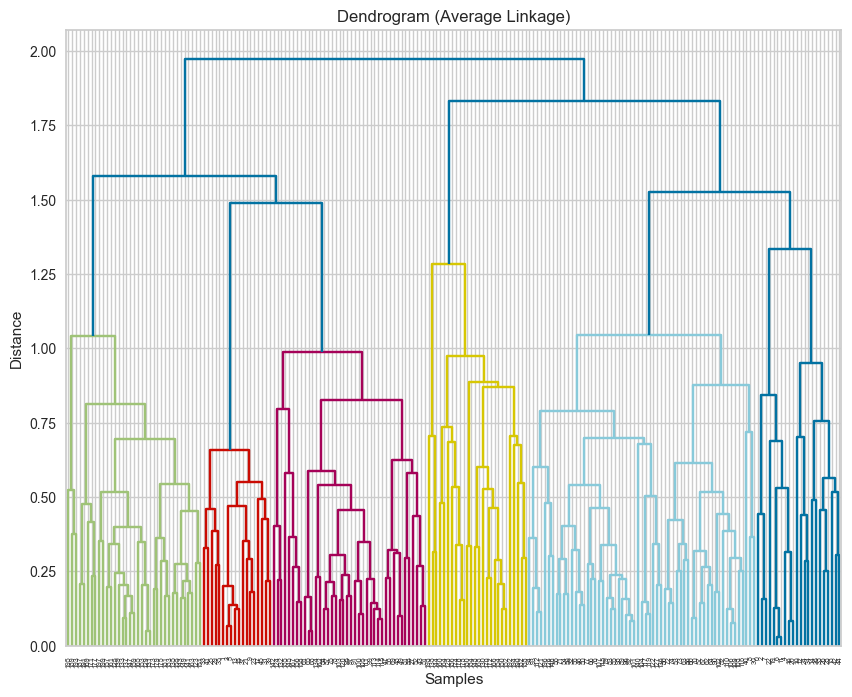

In [96]:
import scipy.cluster.hierarchy as sch

columns_for_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

linkage_complete = sch.linkage(df_normalized[columns_for_clustering], method='complete')

linkage_average = sch.linkage(df_normalized[columns_for_clustering], method='average')

# Plot the dendrogram for complete linkage
plt.figure(figsize=(10, 8))
sch.dendrogram(linkage_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram for average linkage
plt.figure(figsize=(10, 8))
sch.dendrogram(linkage_average)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


### Comment
In this case, the complete linkage dendrogram provides 4 clusters, while the average linkage dendrogram provides 6 clusters. On the other hand, K-Means provided 6 clusters. Therefore, we can say that the average linkage dendrogram agrees with the K-Means clustering, as they both suggest 6 clusters.

## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

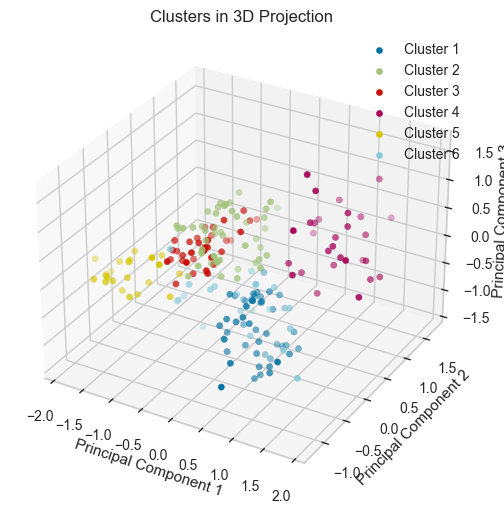

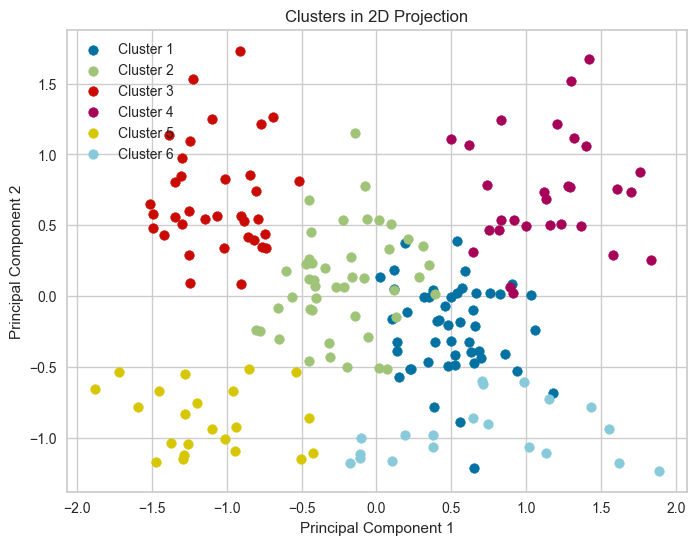

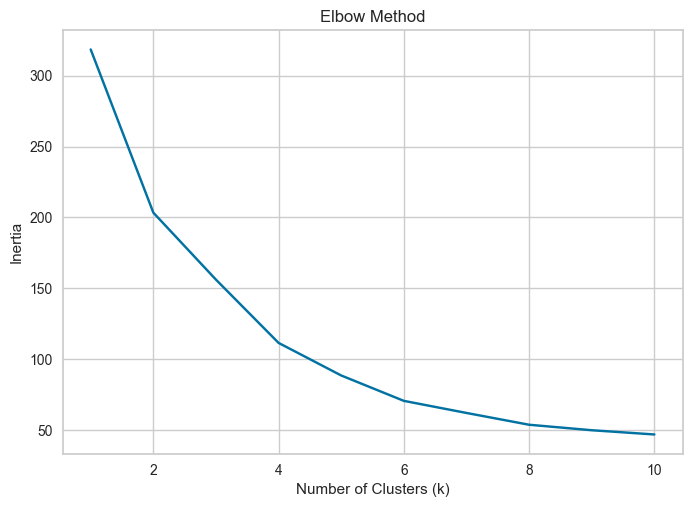

In [97]:
from sklearn.decomposition import PCA

# Select the columns for PCA
columns_for_pca = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the original data using PCA
pca_data = pca.fit_transform(df_normalized[columns_for_pca])                    
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0, n_init=7)
kmeans.fit(pca_data)

# Visualize the resulting clusters in 3D projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in range(6):
    cluster_points = pca_data[kmeans.labels_ == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clusters in 3D Projection')
ax.legend()
plt.show()

plt.figure(figsize=(8, 6))

for label in range(6):
    cluster_points = pca_data[kmeans.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in 2D Projection')

plt.legend()

plt.show()

wcss = []

# Try different values of k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=7)
    kmeans.fit(pca_data)

    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

With PCA


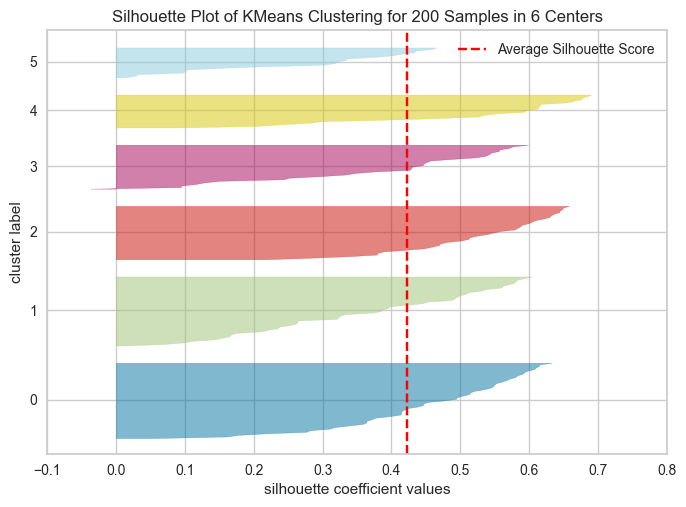

Without PCA


C:\Users\Talha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


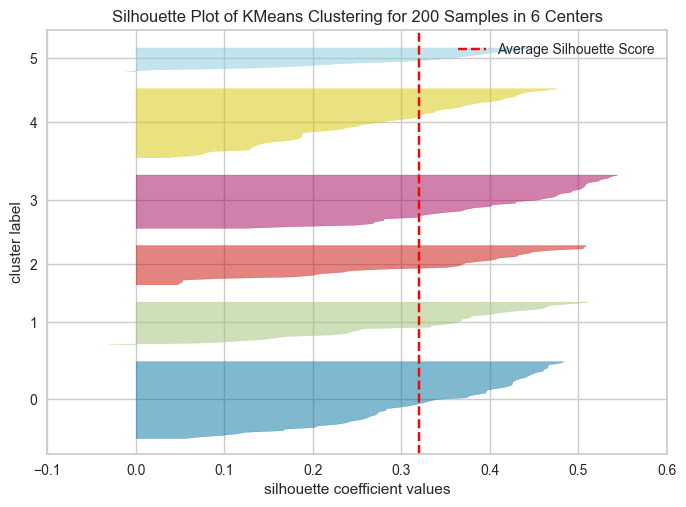

Silhouette Coefficient for K-Means on the original dataset: 0.417759836032728
Silhouette Coefficient for K-Means on the PCA dataset: 0.421871163007047


In [98]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=6, random_state=0, n_init=7)
kmeans.fit(pca_data)

kmeans2 = KMeans(n_clusters=6, random_state=0, n_init=7)
kmeans2.fit(df_normalized)

print("With PCA")
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_data)
visualizer.show()

print("Without PCA")
visualizer2 = SilhouetteVisualizer(kmeans2, colors='yellowbrick')
visualizer2.fit(df_normalized)
visualizer2.show()


silhouette_score_original = silhouette_score(df_normalized[columns_for_clustering], kmeans2.labels_)
print("Silhouette Coefficient for K-Means on the original dataset:", silhouette_score_original)

silhouette_score_pca = silhouette_score(pca_data, kmeans.labels_)
print("Silhouette Coefficient for K-Means on the PCA dataset:", silhouette_score_pca)


### K-means With PCA has greater average coefficient than without PCA. Thus data with PCA is better.